# Linear Models

- Linear relationship between Dependent and Independent variables
- Eg: Weight vs Height, Size of Land vs Price of Land

Y= βX + b

β = Angle (slope)
b = Intercept

We can create a line with beta and b and then calculate the error which this line would have from underlying data points. The idea is to find the line which gives least error. So, it ends up becoming an **optimization** problem.

In [1]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error as mse

In [2]:
# creating the sample dataset
experience = [1.2,1.5,1.9,2.2,2.4,2.5,2.8,3.1,3.3,3.7,4.2,4.4]
salary     = [1.7,2.4,2.3,3.1,3.7,4.2,4.4,6.1,5.4,5.7,6.4,6.2]

data = pd.DataFrame({
    "salary" : salary,
    "experience"   : experience
})
data.head()

,salary,experience
0,1.7,1.2
1,2.4,1.5
2,2.3,1.9
3,3.1,2.2
4,3.7,2.4


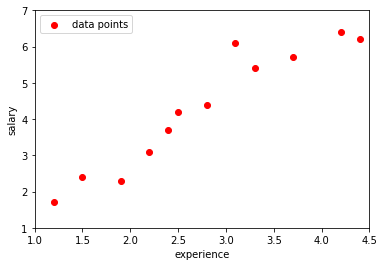

In [3]:
# plotting the data
plt.scatter(data.experience, data.salary, color = 'red', label = 'data points')
plt.xlim(1,4.5)
plt.ylim(1,7)
plt.xlabel('experience')
plt.ylabel('salary')
plt.legend()

### Creating a line

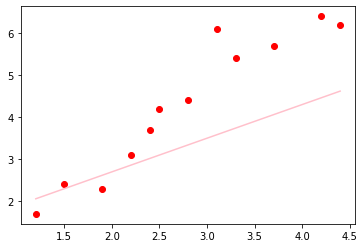

In [4]:
beta = 0.8
b = 1.1

line1 = []

for i in range(len(data)):
    line1.append(data.experience[i]*beta + b)


plt.scatter(data.experience, data.salary, color = 'red')
plt.plot(data.experience, line1, color='pink', label = "line")
plt.show()



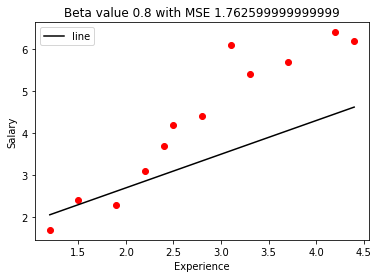

In [10]:
# making lines for different Values of Beta 0.1, 0.8, 1.5
beta = 0.8
# keeping intercept constant
b = 1.1

# to store predicted points
line1 = []

# generating predictions for every data point
for i in range(len(data)):
    line1.append(data.experience[i]*beta + b)

# Plotting the line
plt.scatter(data.experience, data.salary, color = 'red')
plt.plot(data.experience, line1, color = 'black', label = 'line')
#plt.xlim(1,4.5)
#plt.ylim(1,7)
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.legend()
MSE = mse(data.salary, line1)
plt.title("Beta value "+str(beta)+" with MSE "+ str(MSE))
MSE = mse(data.salary, line1)

## Computing Cost over a range of values of Beta


In [6]:
# function to calculate error

def Error(Beta, data):
  # b is constant
    b = 1.1
  
    salary = []
    experience  = data.experience
  
  # Loop to calculate predict salary variables
    for i in range(len(data.experience)):
        tmp = data.experience[i] * Beta + b
        salary.append(tmp)
    MSE = mse(data.salary, salary)
    return MSE

In [7]:
# Range of slopes from 0 to 1.5 with increment of 0.01
slope = [i/100 for i in range(0,150)]
Cost = []
for i in slope:
    cost = Error( Beta = i, data = data)
    Cost.append(cost)

In [8]:
# Arranging in DataFrame
Cost_table = pd.DataFrame({
    'Beta' : slope,
    'Cost' : Cost
})
Cost_table.head()

,Beta,Cost
0,0.00,12.791667
1,0.01,12.585876
2,0.02,12.381806
3,0.03,12.179455
4,0.04,11.978824


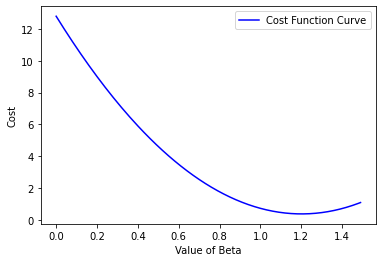

In [9]:
## Visualising cost with respect to Beta
# plotting the cost values corresponding to every value of Beta
plt.plot(Cost_table.Beta, Cost_table.Cost, color = 'blue', label = 'Cost Function Curve')
plt.xlabel('Value of Beta')
plt.ylabel('Cost')
plt.legend()

Now, we need to find a way to identify the location where my cost is lowest. We cannot do it iteratively, so therefore we us gradiant decent method

## Gradient Descent

- It is an Optimization Technique
- It minimize the error generated. Helps to identify lowest cost
- Works Iteratively
- Calculating error at each iteration 
    - optimize model parameters accordinggly.
    - Continue this till the model converges

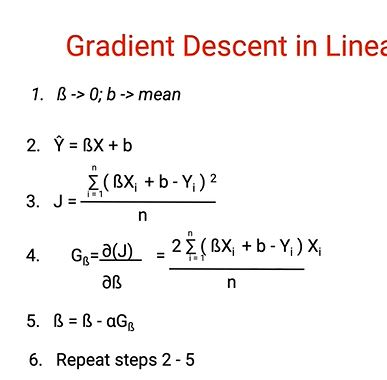

In [11]:
from IPython import display
display.Image("./GD.jpg")


### Convexity of Gradient Decend

When there are muliple minimina, we need to ensure that gradient decend don't stop at *local minima* but actually goes to *global minima*

### *Two Parameters to help find local minima*
1. Random Initialization - When we do random initialization multiple times, most of the times, model should reach towards global minimum.

2. Adjust Learning Rate - Make learning rate big enough so it can jump over the humps made by local minima and always converge to global minima

Gradient Descent is an optimization algorithm used for minimizing the cost function in various supervised machine learning algorithms.

## Assumptions of Linear Regression

1. Linear relationship

    We might need to use transformation - Eg: log(X), root of X, X square
2. No correlation of error terms

   In a linear chart, the difference between the actual value and the predicted values are called **residual**. When you plot these residuals on a chart, there should not be any underlying trend in it. It means, that previous few values of residual should not help me predict the next residual

3. Constant variance of error terms

    In residual plot, if you see the variance increasing or decreasing or any sort of trend in variance of residual, then this violates assumption of LR.
4. No correlation between independent Variables

    **Multicollinearity** - Means that independent variables have collinearity or corelation between them.
   
    Eg: If 3 independent variables - X1, X2 and X3. If X1 and X2 have a high corelation between them then whenever I m trying to understand relation between Y and X1, this will also lead to change in X2. We can still do the regression, but the model will be very volatile. We will get the prediction but any change in data will lead to big change in equation. So, Multicollinearity will still give you prediction, but it ll be difficult to interpret the output.

    To handle Multicollinearity, we can eliminate one of the variable (eg: X2). We can use parameter VIF.
5. Errors normally distributed

    See a normal plot on QQ chart

https://www.analyticsvidhya.com/blog/2016/07/deeper-regression-analysis-assumptions-plots-solutions/

In [12]:
# Importing Data
data = pd.read_csv('train_cleaned.csv')
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [16]:
#Seperating dependent and independent variables
X = data.drop(['Item_Outlet_Sales'], axis=1)
y = data['Item_Outlet_Sales']

data.shape, X.shape, y.shape

((8523, 46), (8523, 45), (8523,))

In [18]:
#splitting data into test and train data
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 23)

## Implementing Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [23]:
# Creating an instance of LR

lr = LR()

#Fitting the model
lr.fit(train_X, train_y)

LinearRegression()

In [50]:
#Predict over Train Data
model_prediction_train = lr.predict(train_X)

model_mae = mae(model_prediction_train, train_y)
model_mae

836.7941153761653

In [49]:
#Predict over Test Data
model_prediction_test = lr.predict(test_X)

model_mae = mae(model_prediction_test, test_y)
model_mae

829.0267354999168

## Parameters of LR

Identify which are the variables that have high impact on the data and which don't.

In [28]:
lr.coef_

array([  -1.4999965 , -126.22441038,   15.27635284,  -18.53926628,
        -52.27863589,   -8.13288586,   28.88718189,   61.20607927,
        -29.68173941,   12.90298833,  -18.5797736 ,  -73.98796352,
         54.70607739,  -62.37562464,  -32.59175237,   41.16184823,
          3.96045126,  -57.86095457,  -38.91668574,   -4.07186723,
         34.442756  ,   94.7254384 ,   25.93168053,  -46.10767185,
         66.6610534 , -484.85962035,  -53.95855585,  158.42158997,
        -40.47112498, -467.7649679 ,  599.00959558,  146.72404878,
        -99.73121196,  305.28242364,  -62.65217693,  -53.95855585,
        495.88629368,  -15.75849549, -225.13472119,  205.41442678,
         19.72029441, -952.62458825,  394.08611764,  -40.47112498,
        599.00959558])

<BarContainer object of 45 artists>

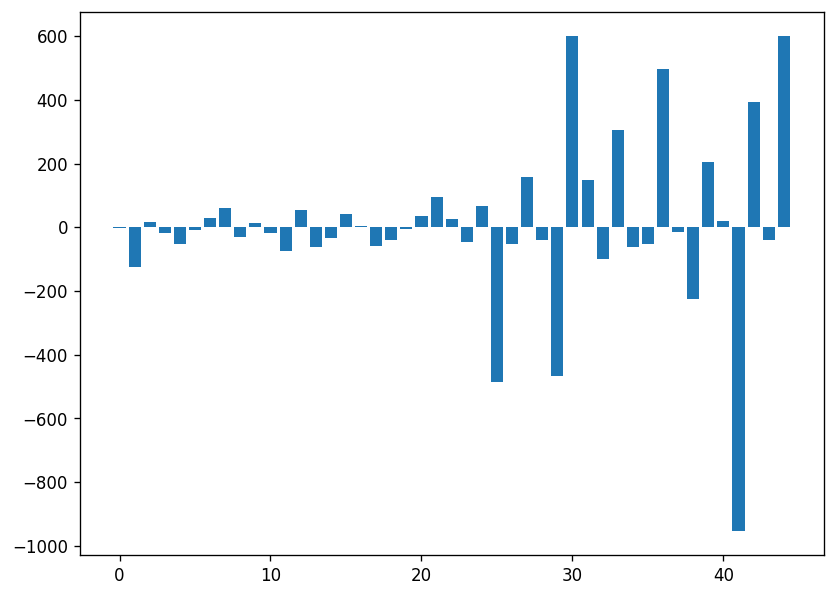

In [37]:
#plotting coefficients
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')

x = range(len(train_X.columns))

y = lr.coef_

plt.bar(x, y)

In [46]:
coeff_data = pd.DataFrame({
    "name_column" : train_X.columns,
    'coeff': y

})

In [47]:
coeff_data.sort_values('coeff')

,name_column,coeff
41,Outlet_Type_Grocery Store,-952.624588
25,Outlet_Identifier_OUT010,-484.859620
29,Outlet_Identifier_OUT019,-467.764968
38,Outlet_Location_Type_Tier 1,-225.134721
1,Item_Visibility,-126.224410
32,Outlet_Identifier_OUT045,-99.731212
11,Item_Type_Breakfast,-73.987964
34,Outlet_Identifier_OUT049,-62.652177
13,Item_Type_Dairy,-62.375625
17,Item_Type_Health and Hygiene,-57.860955


Here, the coffecients are not scaled. Therefore, we cannot use it to draw out conclusions yet.

# Checking assumptions of Linear Model


1. Linear relationship [OK]
2. No correlation of error terms
3. Constant variance of error terms
4. No correlation between independent Variables
5. Errors normally distributed

In [55]:
residuals = pd.DataFrame({
    'fitted_values': test_y,
    'predicted_values': model_prediction_test
})
residuals.head()

,fitted_values,predicted_values
6824,1211.7560,1576.080174
3979,6471.5760,3507.704146
1340,1850.9240,2789.671464
3370,275.6412,933.888959
1992,1701.7848,1586.072110


In [60]:
residuals['residual'] = residuals.fitted_values - residuals.predicted_values 
residuals.head()
#residuals.shape

,fitted_values,predicted_values,residual
6824,1211.7560,1576.080174,-364.324174
3979,6471.5760,3507.704146,2963.871854
1340,1850.9240,2789.671464,-938.747464
3370,275.6412,933.888959,-658.247759
1992,1701.7848,1586.072110,115.712690


### 2. No correlation of error terms - Plotting Residual curve

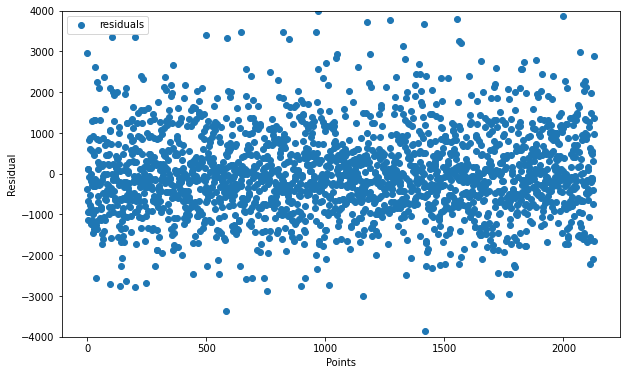

In [68]:
plt.figure(figsize=(10,6))
x = range(0, 2131)
y = residuals.residual

plt.scatter(x,y, label = 'residuals')
plt.xlabel('Points')
plt.ylabel('Residual')
plt.ylim(-4000, 4000)
plt.legend()

### 5. Errors normally distributed - Checking distribution of Residuals


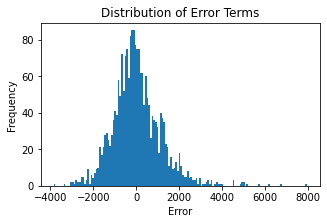

In [72]:
# Histogram for distribution
plt.figure(figsize=(5, 3),  facecolor='w', edgecolor='b')
plt.hist(residuals.residual, bins = 150)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')
plt.show()

According to the Histogram, the distribution of error is nearly normal, But there are some outliers on the Higher end of the errors.

### QQ-Plot (Is the data Normally Distributed?)

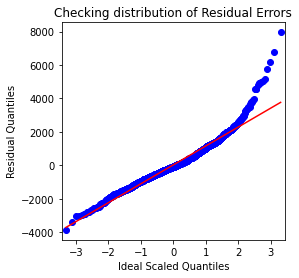

In [76]:
# importing the QQ-plot from the from the statsmodels
from statsmodels.graphics.gofplots import qqplot

## Plotting the QQ plot
fig, ax = plt.subplots(figsize=(4,4))
qqplot(residuals.residual, line = 's' , ax = ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of Residual Errors')
plt.show()

### Variance Inflation Factor (VIF) (Checking for multi collinearity)

In [78]:
# Importing Variance_inflation_Factor funtion from the Statsmodels

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [93]:
# calculate VIF for every column. Will work only for not categorical. Its value should be less than 5
vif = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index=data.columns)
vif

c:\Users\Neelam\Desktop\Desktop\Python\Video\env\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Item_Weight                        2.349925
Item_Visibility                    1.101456
Item_MRP                           1.753170
Outlet_Establishment_Year               inf
Item_Outlet_Sales                  2.292720
Item_Fat_Content_LF                     inf
Item_Fat_Content_Low Fat                inf
Item_Fat_Content_Regular                inf
Item_Fat_Content_low fat                inf
Item_Fat_Content_reg                    inf
Item_Type_Baking Goods                  inf
Item_Type_Breads                        inf
Item_Type_Breakfast                     inf
Item_Type_Canned                        inf
Item_Type_Dairy                         inf
Item_Type_Frozen Foods                  inf
Item_Type_Fruits and Vegetables         inf
Item_Type_Hard Drinks                   inf
Item_Type_Health and Hygiene            inf
Item_Type_Household                     inf
Item_Type_Meat                          inf
Item_Type_Others                        inf
Item_Type_Seafood               

From this list, we clearly see that there happens to be no Independent Variable over the value of 5, which means that there are no features that exhibit the Multicollinearity in the dataset.

## Model Interpretability

So far we have simply been predicting the values using the linear regression, But in order to Interpret the model, the normalising of the data is essential.


In [97]:
# Creating instance of Linear Regresssion
lr = LR(normalize = True)

# Fitting the model
lr.fit(train_X, train_y)

LinearRegression(normalize=True)

In [99]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_X)
k = mae(train_predict, train_y)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 899.9320088548184


In [100]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_X)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     881.0871531675269


Text(0.5, 1.0, 'Normalized Coefficient plot')

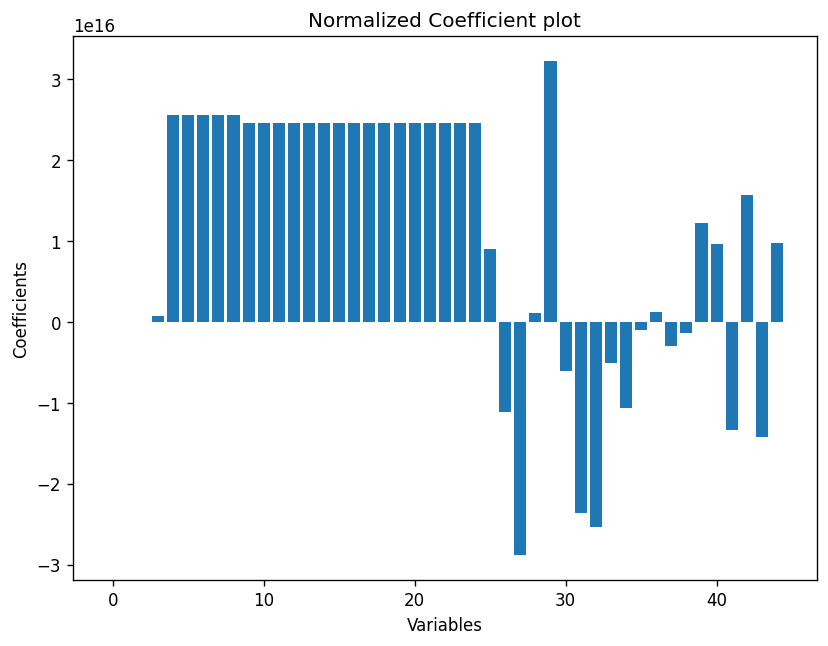

In [107]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_X.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Normalized Coefficient plot')